<a href="https://colab.research.google.com/github/heyy-ishan/gitPractice/blob/main/HAR_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from datetime import datetime

from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Import Keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import BatchNormalization
from keras.regularizers import L1L2

In [3]:
labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING", "STAND_TO_SIT", "SIT_TO_STAND", "SIT_TO_LIE", "LIE_TO_SIT", "STAND_TO_LIE", "LIE_TO_STAND"]

In [2]:
test = pd.read_csv("test.csv")

In [4]:
test.shape

(3161, 565)

In [6]:
test.columns

Index(['Unnamed: 0', 'tBodyAcc-Mean-1', 'tBodyAcc-Mean-2', 'tBodyAcc-Mean-3',
       'tBodyAcc-STD-1', 'tBodyAcc-STD-2', 'tBodyAcc-STD-3', 'tBodyAcc-Mad-1',
       'tBodyAcc-Mad-2', 'tBodyAcc-Mad-3',
       ...
       'tBodyAcc-AngleWRTGravity-1', 'tBodyAccJerk-AngleWRTGravity-1',
       'tBodyGyro-AngleWRTGravity-1', 'tBodyGyroJerk-AngleWRTGravity-1',
       'tXAxisAcc-AngleWRTGravity-1', 'tYAxisAcc-AngleWRTGravity-1',
       'tZAxisAcc-AngleWRTGravity-1', 'subject', 'Activity', 'Activity_name'],
      dtype='object', length=565)

In [7]:
train = pd.read_csv("train.csv")b

In [8]:
train.shape

(7766, 565)

In [9]:
train.head()

,Unnamed: 0,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,...,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1,subject,Activity,Activity_name
0,0,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,...,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,1,5,STANDING
1,1,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,...,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271,1,5,STANDING
2,2,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826,1,5,STANDING
3,3,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,...,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080,1,5,STANDING
4,4,0.038988,0.004109,-0.017340,-0.997438,-0.993485,-0.996692,-0.997522,-0.993494,-0.996916,...,0.082632,-0.143439,0.275041,-0.368224,-0.849927,0.184795,-0.035326,1,5,STANDING


In [10]:
test.head()

,Unnamed: 0,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,...,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1,subject,Activity,Activity_name
0,0,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,-0.966820,...,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825,2,5,STANDING
1,1,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,-0.977508,...,-0.034956,0.202302,0.064103,0.145068,-0.703355,0.280062,-0.072302,2,5,STANDING
2,2,0.036205,-0.018148,-0.025240,-0.994845,-0.981534,-0.976175,-0.995169,-0.983020,-0.980785,...,-0.017067,0.154438,0.340134,0.296407,-0.699545,0.284093,-0.070079,2,5,STANDING
3,3,0.038034,-0.013437,-0.032899,-0.993955,-0.977493,-0.984290,-0.994006,-0.977354,-0.985899,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692849,0.290701,-0.066849,2,5,STANDING
4,4,0.039803,-0.004316,-0.022932,-0.994558,-0.979556,-0.974890,-0.994480,-0.979701,-0.978969,...,-0.095681,0.048849,0.760684,-0.072216,-0.690425,0.294875,-0.061498,2,5,STANDING


In [12]:
#making X_train and Y_train
X_train = train.drop(["Unnamed: 0", 'subject', 'Activity', 'Activity_name'], axis=1)
y_train = train.Activity_name

#making X_test and Y_test
X_test = test.drop(["Unnamed: 0", 'subject', 'Activity', 'Activity_name'], axis=1)
y_test = test.Activity_name

In [13]:
X_train.shape, y_train.shape

((7766, 561), (7766,))

In [14]:
X_test.shape, y_test.shape

((3161, 561), (3161,))

### Function to plot the confusion matrix

In [18]:
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Function to perform the model

In [19]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True,print_cm=True, cm_cmap=plt.cm.Greens):


    # to store results at various phases
    results = dict()

    # time at which model starts training
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done....!\n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('==> training time:- {}\n'.format(results['training_time']))


    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done....!\n')
    results['testing_time'] = test_end_time - test_start_time
    print('==> testing time:- {}\n'.format(results['testing_time']))
    results['predicted'] = y_pred


    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('==> Accuracy:- {}\n'.format(accuracy))


    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm:
        print('\n ********Confusion Matrix********')
        print('\n {}'.format(cm))

    # plot confusin matrix
    plt.figure(figsize=(12,12))
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()

    # get classification report
    print('****************| Classifiction Report |****************')
    classification_report = metrics.classification_report(y_test, y_pred)

    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)

    # add the trained  model to the results
    results['model'] = model

    return results



### Logistic Regression:

training the model..
Done....!

==> training time:- 0:00:07.228576

Predicting test data
Done....!

==> testing time:- 0:00:00.037801

==> Accuracy:- 0.872192344194875


 ********Confusion Matrix********

 [[542   1   0   0   0   0   0   0   0   1   0   1]
 [  0  16   3   4   0   0   0   0   0   0   0   2]
 [  0   4   5   1   0   0   0   0   0  16   0   1]
 [  1   4   1 424   0   2  60   4   0   0   0  12]
 [  8   0   0   1  16   0   0   7   0   0   0   0]
 [  0   0   0   1   0   2   6   0   0   0   0   1]
 [  0   0   0  28   0   0 515   2   2   1   1   7]
 [  5   1   1   1  10   0   5  24   1   0   1   0]
 [  0   1   0  11   0   0   3   0   8   0   0   0]
 [  0   0   3   0   0   0   0   0   0 473  13   7]
 [  0   0   0   0   0   0   0   0   0  38 327  55]
 [  0   1   0   1   0   0   8   0   0  17  38 405]]


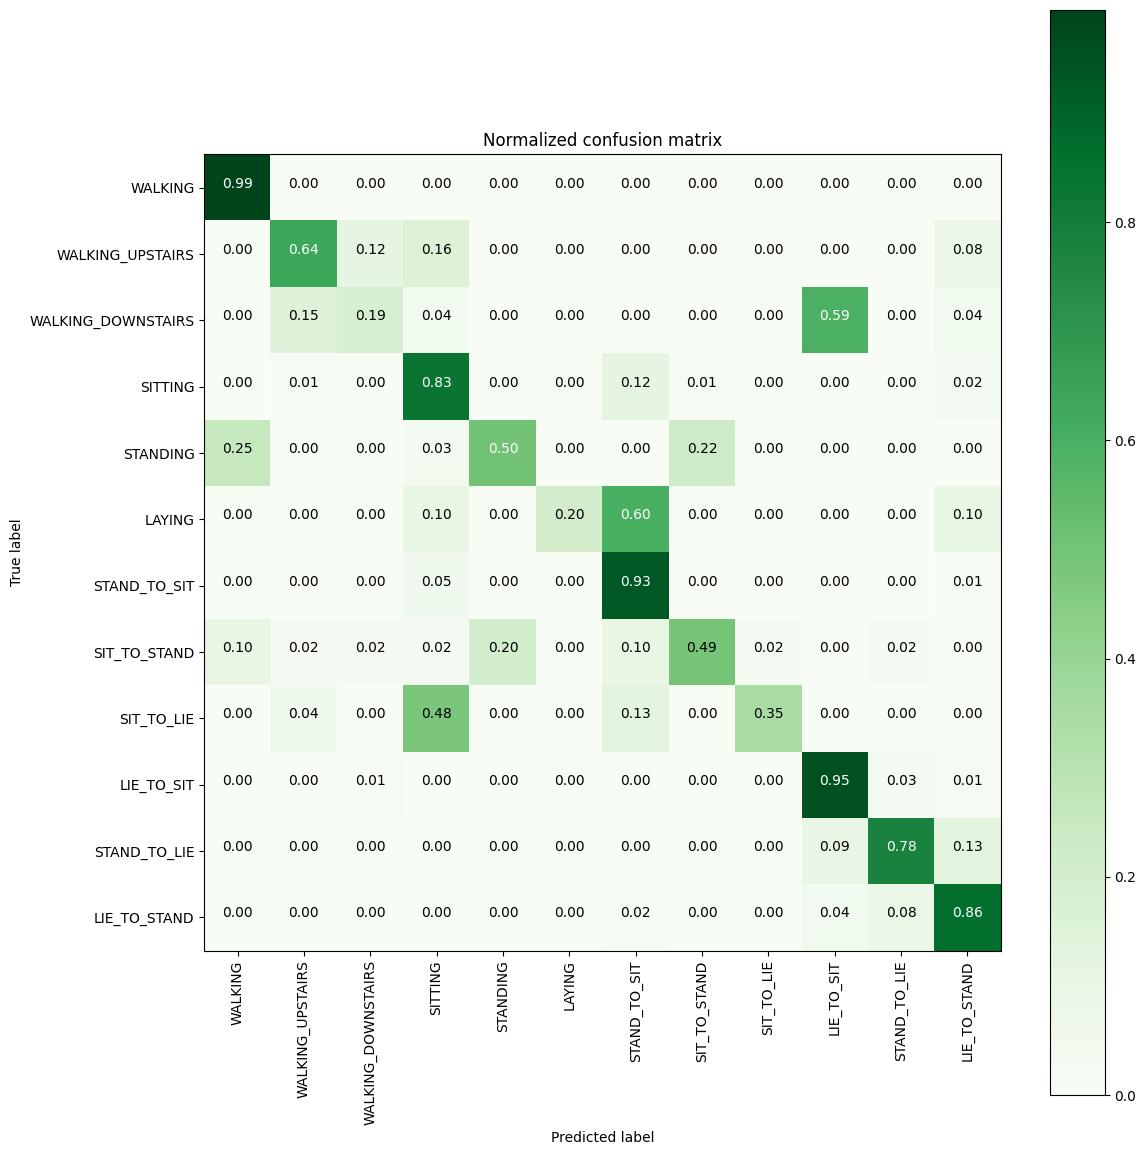

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       0.97      0.99      0.98       545
        LIE_TO_SIT       0.57      0.64      0.60        25
      LIE_TO_STAND       0.38      0.19      0.25        27
           SITTING       0.90      0.83      0.87       508
        SIT_TO_LIE       0.62      0.50      0.55        32
      SIT_TO_STAND       0.50      0.20      0.29        10
          STANDING       0.86      0.93      0.89       556
      STAND_TO_LIE       0.65      0.49      0.56        49
      STAND_TO_SIT       0.73      0.35      0.47        23
           WALKING       0.87      0.95      0.91       496
WALKING_DOWNSTAIRS       0.86      0.78      0.82       420
  WALKING_UPSTAIRS       0.82      0.86      0.84       470

          accuracy                           0.87      3161
         macro avg       0.73      0.64      0.67      3161
      weighted avg       0.87      0.87  

In [21]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=ConvergenceWarning)


log_reg = linear_model.LogisticRegression()
log_reg_results =  perform_model(log_reg, X_train, y_train, X_test, y_test, class_labels=labels)

print(log_reg_results)


### Linear SVC

training the model..
Done....!

==> training time:- 0:00:31.545424

Predicting test data
Done....!

==> testing time:- 0:00:00.016348

==> Accuracy:- 0.8886428345460298


 ********Confusion Matrix********

 [[533   0   0   0   0   1   0   3   0   1   0   7]
 [  0  18   0   5   0   0   1   0   0   0   0   1]
 [  1   1   6   1   0   0   1   0   0  16   1   0]
 [  0   2   1 428   1   1  63   1   0   0   3   8]
 [  9   0   1   2  12   0   0   8   0   0   0   0]
 [  0   0   0   1   0   1   8   0   0   0   0   0]
 [  0   0   1  14   0   1 525   2   1   0   1  11]
 [  2   1   0   2  13   0   5  23   2   1   0   0]
 [  0   0   0   7   0   0   2   0  13   1   0   0]
 [  0   2   2   0   0   0   0   0   0 474  11   7]
 [  0   1   0   0   0   0   0   1   0  17 360  41]
 [  0   0   1   2   0   0   6   1   0  11  33 416]]


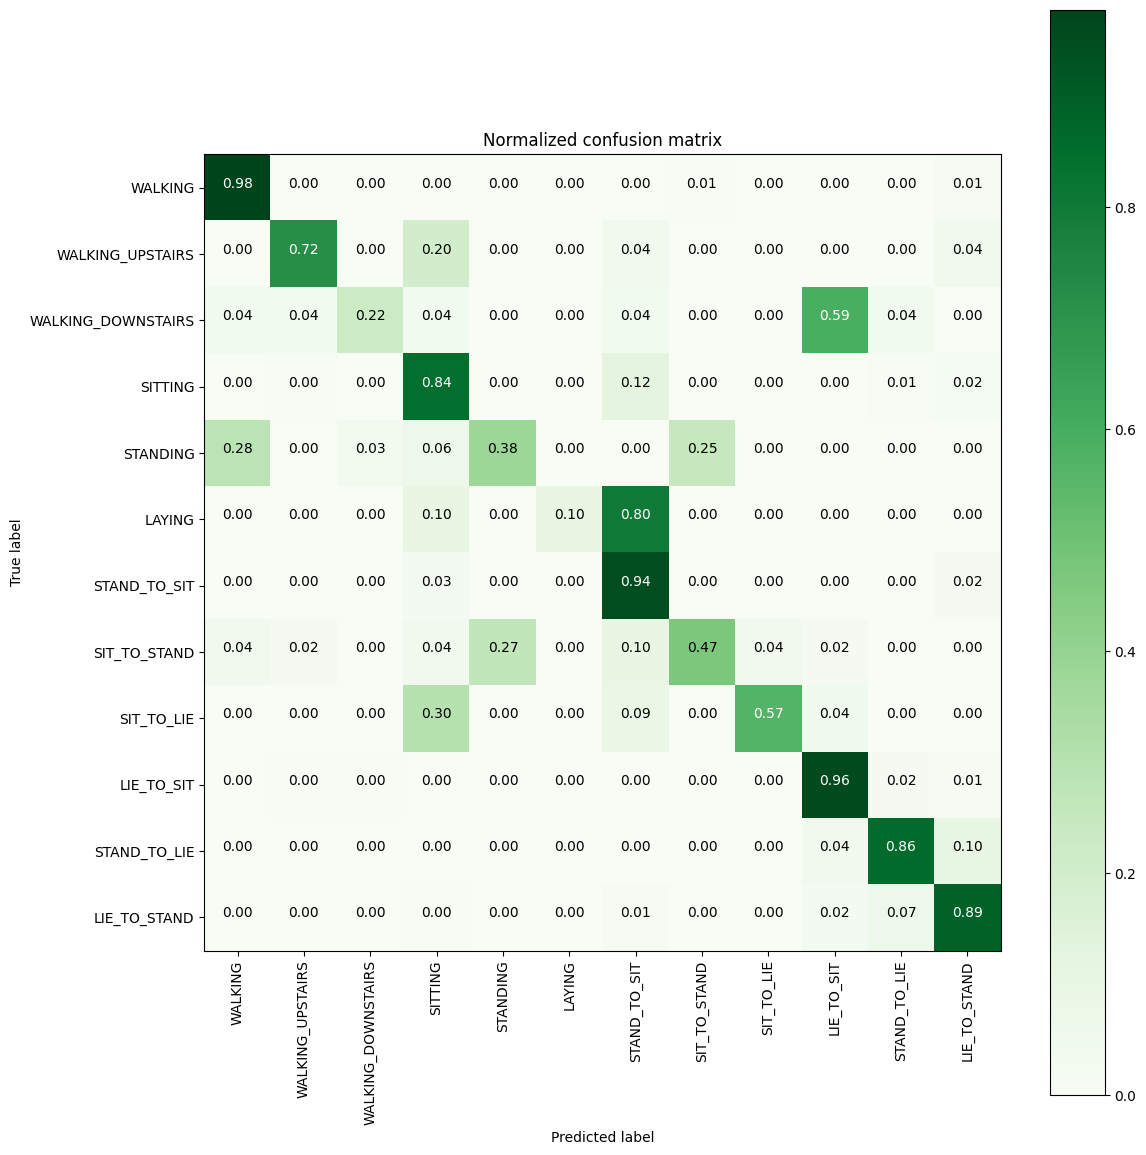

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       0.98      0.98      0.98       545
        LIE_TO_SIT       0.72      0.72      0.72        25
      LIE_TO_STAND       0.50      0.22      0.31        27
           SITTING       0.93      0.84      0.88       508
        SIT_TO_LIE       0.46      0.38      0.41        32
      SIT_TO_STAND       0.25      0.10      0.14        10
          STANDING       0.86      0.94      0.90       556
      STAND_TO_LIE       0.59      0.47      0.52        49
      STAND_TO_SIT       0.81      0.57      0.67        23
           WALKING       0.91      0.96      0.93       496
WALKING_DOWNSTAIRS       0.88      0.86      0.87       420
  WALKING_UPSTAIRS       0.85      0.89      0.87       470

          accuracy                           0.89      3161
         macro avg       0.73      0.66      0.68      3161
      weighted avg       0.88      0.89  

In [23]:
lr_svc = LinearSVC(tol=0.00005)
lr_svc_results = perform_model(lr_svc, X_train, y_train, X_test, y_test, class_labels=labels)
print(lr_svc_results)

### Decision Trees

training the model..
Done....!

==> training time:- 0:00:13.186338

Predicting test data
Done....!

==> testing time:- 0:00:00.009800

==> Accuracy:- 0.786143625434989


 ********Confusion Matrix********

 [[536   0   2   1   3   0   0   3   0   0   0   0]
 [  1  13   3   5   1   0   0   1   0   1   0   0]
 [  0   4   6   0   0   0   3   1   0   9   3   1]
 [  0   2   1 401   2   3  89   2   2   0   0   6]
 [  9   0   1   1  15   0   3   3   0   0   0   0]
 [  0   0   0   1   0   4   5   0   0   0   0   0]
 [  0   0   0  69   4   0 457   2   4   3   0  17]
 [  5   2   1   5  13   0   6  17   0   0   0   0]
 [  0   3   1   5   0   1   4   0   9   0   0   0]
 [  0   0  10   0   0   0   0   0   1 429  36  20]
 [  0   4   3   0   1   0   2   0   0  45 304  61]
 [  0   1   7   2   0   1  12   3   0  56  94 294]]


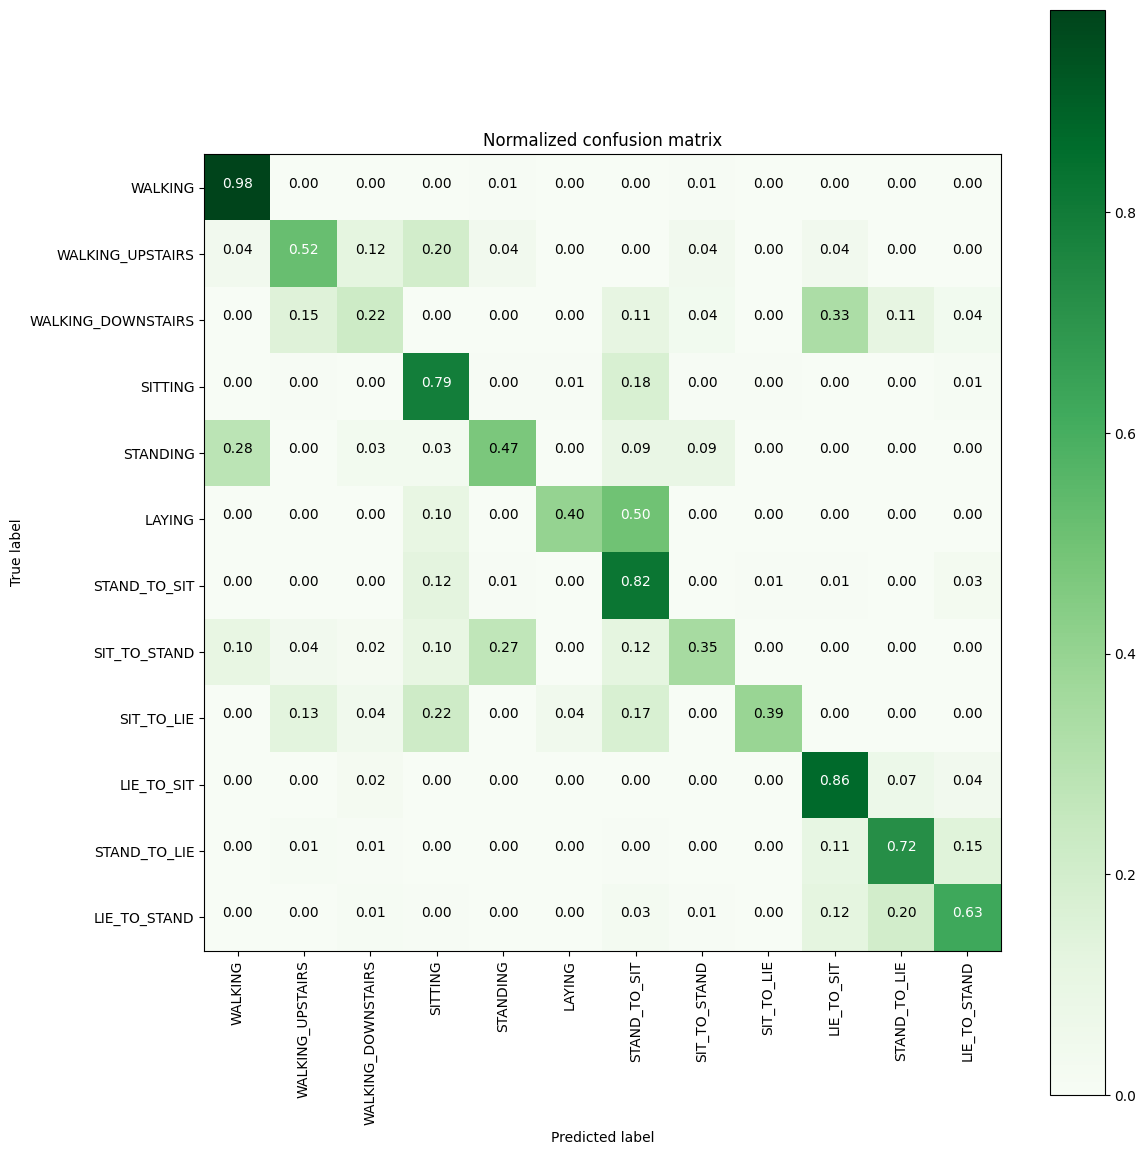

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       0.97      0.98      0.98       545
        LIE_TO_SIT       0.45      0.52      0.48        25
      LIE_TO_STAND       0.17      0.22      0.19        27
           SITTING       0.82      0.79      0.80       508
        SIT_TO_LIE       0.38      0.47      0.42        32
      SIT_TO_STAND       0.44      0.40      0.42        10
          STANDING       0.79      0.82      0.80       556
      STAND_TO_LIE       0.53      0.35      0.42        49
      STAND_TO_SIT       0.56      0.39      0.46        23
           WALKING       0.79      0.86      0.83       496
WALKING_DOWNSTAIRS       0.70      0.72      0.71       420
  WALKING_UPSTAIRS       0.74      0.63      0.68       470

          accuracy                           0.79      3161
         macro avg       0.61      0.60      0.60      3161
      weighted avg       0.79      0.79  

In [25]:
dt = DecisionTreeClassifier()
dt_result = perform_model(dt, X_train, y_train, X_test, y_test, class_labels=labels)
print(dt_result)

### Random Forest Classifier

training the model..
Done....!

==> training time:- 0:00:25.707787

Predicting test data
Done....!

==> testing time:- 0:00:00.091853

==> Accuracy:- 0.8630180322682696


 ********Confusion Matrix********

 [[542   0   0   1   0   0   0   0   0   1   0   1]
 [  0  16   1   8   0   0   0   0   0   0   0   0]
 [  0   4   3   0   0   0   2   1   0  16   0   1]
 [  0   0   0 440   0   0  68   0   0   0   0   0]
 [  8   0   0   3  13   0   0   8   0   0   0   0]
 [  0   0   0   3   0   1   6   0   0   0   0   0]
 [  0   0   0  45   0   0 507   1   1   2   0   0]
 [  7   0   0  12   7   0   8  14   0   1   0   0]
 [  0   0   0  12   0   0   5   0   6   0   0   0]
 [  0   0   0   0   0   0   0   0   0 464  18  14]
 [  0   0   0   0   0   0   0   0   0  19 339  62]
 [  0   0   0   1   0   0  12   0   0  35  39 383]]


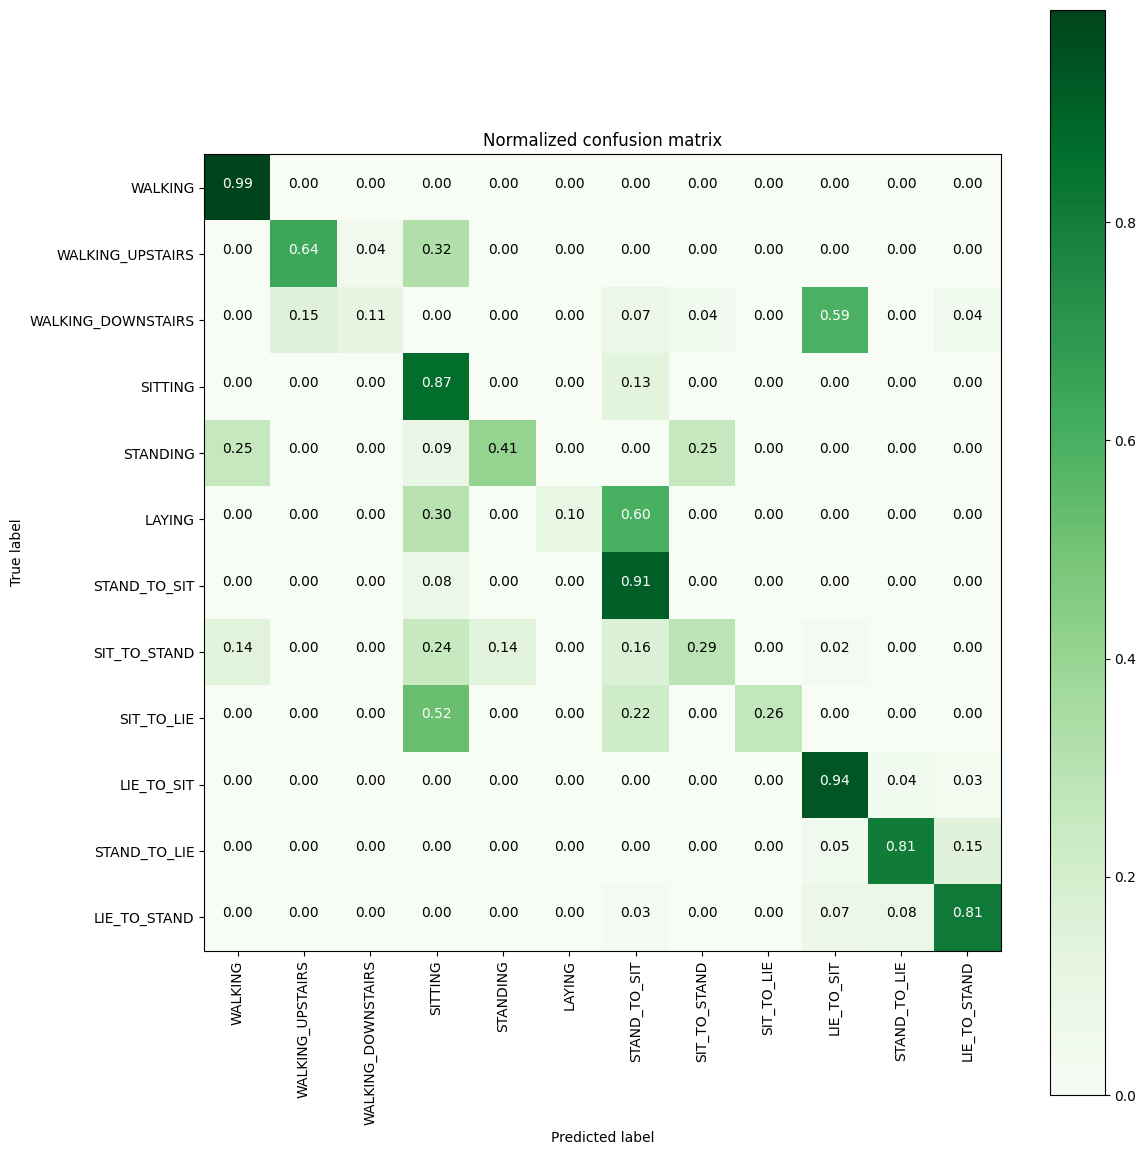

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       0.97      0.99      0.98       545
        LIE_TO_SIT       0.80      0.64      0.71        25
      LIE_TO_STAND       0.75      0.11      0.19        27
           SITTING       0.84      0.87      0.85       508
        SIT_TO_LIE       0.65      0.41      0.50        32
      SIT_TO_STAND       1.00      0.10      0.18        10
          STANDING       0.83      0.91      0.87       556
      STAND_TO_LIE       0.58      0.29      0.38        49
      STAND_TO_SIT       0.86      0.26      0.40        23
           WALKING       0.86      0.94      0.90       496
WALKING_DOWNSTAIRS       0.86      0.81      0.83       420
  WALKING_UPSTAIRS       0.83      0.81      0.82       470

          accuracy                           0.86      3161
         macro avg       0.82      0.59      0.64      3161
      weighted avg       0.86      0.86  

In [27]:
rfc = RandomForestClassifier()
rfc_results = perform_model(rfc, X_train, y_train, X_test, y_test, class_labels=labels)
print(rfc_results)

### Comparing the results

In [31]:
# ***************************** Print Accuracy and Error ******************************

print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_results['accuracy'] * 100,\
                                                  100-(log_reg_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_results['accuracy'] * 100,\
                                                        100-(lr_svc_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_result['accuracy'] * 100,\
                                                        100-(dt_result['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_results['accuracy'] * 100,\
                                                           100-(rfc_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 87.22%       12.78%
Linear SVC          : 88.86%       11.14% 
DecisionTree        : 78.61%      21.39% 
Random Forest       : 86.3%      13.7% 


# Applying LSTM

In [32]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

In [33]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32

In [34]:
#function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [37]:
X_train.head()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
1,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
2,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
3,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080
4,0.038988,0.004109,-0.017340,-0.997438,-0.993485,-0.996692,-0.997522,-0.993494,-0.996916,-0.801982,...,0.074999,-0.554902,-0.844224,0.082632,-0.143439,0.275041,-0.368224,-0.849927,0.184795,-0.035326


In [40]:
X_train_np = np.array(X_train)
X_train_np

array([[ 0.03948004, -0.00213128, -0.02906736, ..., -0.8450924 ,
         0.18026111, -0.04743634],
       [ 0.03997778, -0.00515272, -0.02265071, ..., -0.84923013,
         0.18060956, -0.04227136],
       [ 0.03978456, -0.01180878, -0.02891578, ..., -0.84894659,
         0.18190709, -0.04082622],
       ...,
       [ 0.03745094, -0.00272442,  0.02100941, ..., -0.77956634,
         0.24912145,  0.04707077],
       [ 0.04401105, -0.00453578, -0.0512422 , ..., -0.78560327,
         0.24640867,  0.03170003],
       [ 0.06895376,  0.00181032, -0.08032343, ..., -0.78369253,
         0.24678499,  0.04298129]])

In [41]:
len(X_train_np)

7766